In [ ]:

# https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html#

# https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification/data

# https://www.kaggle.com/code/muhammadfaizan65/car-insurance-claim-prediction-detailed-eda-rfc -> Notate qualcosa di strano nelle performance?

import h2o
import pandas as pd
import datetime

from utils import _ds_common_pandas_dataframe_split_main

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

start = datetime.datetime.now()
print(start)


2025-03-06 11:17:56.302128


# Import Data

In [ ]:

df = pd.read_csv("train.csv")
df.head()


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:

df.isnull().sum().sum()


0

In [ ]:

df["engine_type"].value_counts()


F8D Petrol Engine            14948
1.5 L U2 CRDi                14018
K Series Dual jet            13776
K10C                          4173
1.2 L K Series Engine         2940
1.0 SCe                       2373
i-DTEC                        2114
1.5 Turbocharged Revotorq     1598
G12B                          1209
1.2 L K12N Dualjet            1080
1.5 Turbocharged Revotron      363
Name: engine_type, dtype: int64

In [ ]:

df["max_torque"].value_counts()


113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64

In [ ]:

df["max_power"].value_counts()


88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: max_power, dtype: int64

In [ ]:

df["max_torque_nm"] = df["max_torque"].map(lambda x: float(x.split("@")[0].replace("Nm", "")))
df["max_torque_rpm"] = df["max_torque"].map(lambda x: float(x.split("@")[1].replace("rpm", "")))
df["max_power_bhp"] = df["max_power"].map(lambda x: float(x.split("@")[0].replace("bhp", "")))
df["max_power_rpm"] = df["max_power"].map(lambda x: float(x.split("@")[1].replace("rpm", "")))


# Explore Data

In [ ]:

df.describe(include="all")


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rpm
count,58592,58592.000000,58592.000000,58592.000000,58592,58592.000000,58592.000000,58592,58592,58592,58592,58592,58592,58592.000000,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000,58592,58592.000000,58592,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
unique,58592,NaN,NaN,NaN,22,NaN,NaN,6,11,3,9,9,11,NaN,2,2,2,2,2,2,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,ID00001,NaN,NaN,NaN,C8,NaN,NaN,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,NaN,No,Yes,No,Yes,No,Drum,NaN,NaN,Manual,NaN,Power,NaN,NaN,NaN,NaN,NaN,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,13654,NaN,NaN,18314,14948,20532,17796,17796,14948,NaN,40191,35526,44574,56219,35704,44574,NaN,NaN,38181,NaN,33502,NaN,NaN,NaN,NaN,NaN,33928,41634,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.611246,0.069424,0.469420,NaN,18826.858667,1.763722,NaN,NaN,NaN,NaN,NaN,NaN,3.137066,NaN,NaN,NaN,NaN,NaN,NaN,1162.355851,3.626963,NaN,5.245443,NaN,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759950,0.063968,134.450937,3533.176031,78.976765,5307.163094
std,NaN,0.414156,0.056721,0.122886,NaN,17660.174792,1.136988,NaN,NaN,NaN,NaN,NaN,NaN,1.832641,NaN,NaN,NaN,NaN,NaN,NaN,266.304786,0.483616,NaN,0.430353,NaN,0.228061,311.457119,112.089135,79.62227,212.423085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.389576,0.244698,73.146794,725.960661,27.699259,916.770819
min,NaN,0.002735,0.000000,0.288462,NaN,290.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,60.000000,1750.000000,40.360000,3600.000000
25%,NaN,0.210250,0.020000,0.365385,NaN,6112.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,60.000000,2750.000000,40.360000,4000.000000
50%,NaN,0.573792,0.060000,0.451923,NaN,8794.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1197.000000,4.000000,NaN,5.000000,NaN,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,113.000000,3500.000000,88.500000,6000.000000
75%,NaN,1.039104,0.110000,0.548077,NaN,27003.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1493.000000,4.000000,NaN,5.000000,NaN,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,200.000000,4400.000000,97.890000,6000.000000


# Split Data

In [ ]:

## Train/test
df_split_train_test, dict_computed_metrics, niteration  = _ds_common_pandas_dataframe_split_main(
    df=df,
    list_columns_unique=["policy_id"],
    list_columns_primary_key=["policy_id"],
    str_colname_split="train_test_split_column",
    dict_splits={"train": 0.75, "test": 0.25},
    dict_metrics={"is_claim": ["mean", "std"]},
    dict_metrics_tolerance={"is_claim_mean": 0.01, "is_claim_std": 0.01},
    int_seed=1,
    int_max_number_iterations=100
)


## Cross-validation
df_split_train_test.reset_index(drop=True, inplace=True)
df_split_cv, dict_computed_metrics, niteration  = _ds_common_pandas_dataframe_split_main(
    df=df_split_train_test[df_split_train_test["train_test_split_column"]=="train"].copy(),
    list_columns_unique=["policy_id"],
    list_columns_primary_key=["policy_id"],
    str_colname_split="cv_split_column",
    dict_splits={"1": 0.25, "2": 0.25, "3": 0.25, "4": 0.25},
    dict_metrics={"is_claim": ["mean", "std"]},
    dict_metrics_tolerance={"is_claim_mean": 0.1, "is_claim_std": 0.1},
    int_seed=1,
    int_max_number_iterations=100
)


Achieved metrics convergence at seed 2 and iteration 2
Achieved metrics convergence at seed 2 and iteration 2


In [ ]:

df_split_train_test.shape, df_split_cv.shape


((58592, 3), (43781, 3))

In [ ]:

df_split_train_test.head()


,is_claim,policy_id,train_test_split_column
0,0,ID00001,train
1,0,ID00002,train
2,0,ID00003,test
3,0,ID00004,train
4,0,ID00005,train


In [ ]:

df_split_cv.head()


,is_claim,policy_id,cv_split_column
0,0,ID00001,3
1,0,ID00002,1
3,0,ID00004,1
4,0,ID00005,4
5,0,ID00006,2


In [ ]:

df_split_train_test[["is_claim", "train_test_split_column"]].groupby(by="train_test_split_column").mean()


,is_claim
train_test_split_column,
test,0.064277
train,0.063863


In [ ]:

df_split_train_test[["is_claim", "train_test_split_column"]].groupby(by="train_test_split_column").count()


,is_claim
train_test_split_column,
test,14811
train,43781


In [ ]:

df_split_cv[["is_claim", "cv_split_column"]].groupby(by="cv_split_column").mean()


,is_claim
cv_split_column,
1,0.062982
2,0.063391
3,0.061907
4,0.065185


In [ ]:

df_split_cv[["is_claim", "cv_split_column"]].groupby(by="cv_split_column").count()


,is_claim
cv_split_column,
1,8161
2,8203
3,8222
4,8100


In [ ]:

df = pd.merge(left=df, right=df_split_cv[["cv_split_column", "policy_id"]], how="left", on="policy_id")
df = pd.merge(left=df, right=df_split_train_test[["train_test_split_column", "policy_id"]], how="left", on="policy_id")
df["cv_split_column"] = df["cv_split_column"].map(lambda x: "-999" if pd.isnull(x) else x)


In [ ]:

df[["is_claim", "cv_split_column"]].groupby(by="cv_split_column").mean()


,is_claim
cv_split_column,
-999,0.064734
1,0.062982
2,0.063391
3,0.061907
4,0.065185


In [ ]:

df.to_parquet("training_dataset.parquet")


In [ ]:

del df


# Model Fitting

In [ ]:

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.14" 2025-01-21; OpenJDK Runtime Environment (build 17.0.14+7-Ubuntu-122.04.1); OpenJDK 64-Bit Server VM (build 17.0.14+7-Ubuntu-122.04.1, mixed mode, sharing)
  Starting server from /mnt/custom-file-systems/efs/fs-097144510613850bb_fsap-087c66f68e1c6cd90/axa-ds-catnat/catnat-env/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfaz1igf0
  JVM stdout: /tmp/tmpfaz1igf0/h2o_sagemaker_user_started_from_python.out
  JVM stderr: /tmp/tmpfaz1igf0/h2o_sagemaker_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
 successful.o H2O server at http://127.0.0.1:54321 ...


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,"2 years, 10 months and 20 days !!!"
H2O_cluster_name:,H2O_from_python_sagemaker_user_xe2doi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.434 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [ ]:

df = h2o.import_file("training_dataset.parquet")


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:

df.describe()


Rows:58592
Cols:51




,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rpm,cv_split_column,train_test_split_column,__index_level_0__
type,string,real,real,real,enum,int,int,enum,enum,enum,enum,enum,enum,int,enum,enum,enum,enum,enum,enum,int,int,enum,int,enum,real,int,int,int,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,real,int,real,int,enum,enum,int
mins,NaN,0.0027352728405130003,0.0,0.28846153846153805,,290.0,1.0,,,,,,,1.0,,,,,,,796.0,3.0,,5.0,,4.5,3445.0,1475.0,1475.0,1051.0,,,,,,,,,,,,,0.0,0.0,60.0,1750.0,40.36000000000001,3600.0,,,0.0
mean,NaN,0.6112461623305396,0.06942364145275762,0.4694200507814164,,18826.85866671213,1.7637220098306956,,,,,,,3.1370664937192685,,,,,,,1162.355850628074,3.626962725286732,,5.245443063899496,,4.852892886400925,3850.4768910431508,1672.2336667121788,1553.3353700163752,1385.2768125341374,,,,,,,,,,,,,1.759950163844897,0.06396777717094485,134.45093698798502,3533.176030857459,78.97676542872676,5307.163093937722,,,29295.5
maxs,NaN,1.3966410769938902,1.0,1.0,,73430.0,5.0,,,,,,,6.0,,,,,,,1498.0,4.0,,6.0,,5.2,4300.0,1811.0,1825.0,1720.0,,,,,,,,,,,,,5.0,1.0,250.0,4400.0,118.36,6000.0,,,58591.0
sigma,NaN,0.41415648722519194,0.056720648234706274,0.1228858846682188,,17660.174791838483,1.1369875335132213,,,,,,,1.8326413087377917,,,,,,,266.3047864018627,0.4836160234473961,,0.43035325860417006,,0.22806081763948008,311.457118938695,112.08913487764424,79.62226986783435,212.42308511582476,,,,,,,,,,,,,1.3895764901008039,0.2446976145873793,73.14679385796804,725.9606609650133,27.699258823032793,916.77081920746,,,16914.197823130722
zeros,0,0,5257,0,,0,0,,,,,,,0,,,,,,,0,0,,0,,0,0,0,0,0,,,,,,,,,,,,,19097,54844,0,0,0,0,,,1
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,ID00001,0.5158735899581719,0.05,0.6442307692307689,C1,4990.0,1.0,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5.0,Power,4.6,3445.0,1515.0,1475.0,1185.0,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0.0,0.0,60.0,3500.0,40.36000000000001,6000.0,3,train,0.0
1,ID00002,0.6726185135477329,0.02,0.375,C2,27003.0,1.0,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5.0,Power,4.6,3445.0,1515.0,1475.0,1185.0,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0.0,0.0,60.0,3500.0,40.36000000000001,6000.0,1,train,1.0
2,ID00003,0.841110255796233,0.02,0.384615384615385,C3,4076.0,1.0,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,No,No,Yes,No,Drum,796.0,3.0,Manual,5.0,Power,4.6,3445.0,1515.0,1475.0,1185.0,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0.0,0.0,60.0,3500.0,40.36000000000001,6000.0,-999,test,2.0


In [ ]:

df["is_claim"] = df["is_claim"].asfactor()

train_mask = df["train_test_split_column"] == "train"
df_train = df[train_mask, :]

test_mask = df["train_test_split_column"] == "test"
df_test = df[test_mask, :]


In [ ]:

from h2o.automl import H2OAutoML

def fit_automl_get_performances():

    aml = H2OAutoML(max_models=max_models,
                    seed=seed,
                    sort_metric=sort_metric,
                    include_algos=include_algos,
                    exploitation_ratio=exploitation_ratio,
                    balance_classes=balance_classes)

    aml.train(x=list_features,
              y="is_claim",
              training_frame=df_train,
              fold_column="cv_split_column")

    perf_train = aml.leader.model_performance(df_train)._metric_json
    print("train")
    for el in list_metrics_model_performance:
        print(el, perf_train.get(el))
    table_max_scores = perf_train.get("max_criteria_and_metric_scores").as_data_frame()
    print(table_max_scores[table_max_scores["metric"].isin(["max f1", "max accuracy"])])

    perf_test = aml.leader.model_performance(df_test)._metric_json
    print("\ntest")
    for el in list_metrics_model_performance:
        print(el, perf_test.get(el))
    table_max_scores = perf_test.get("max_criteria_and_metric_scores").as_data_frame()
    print(table_max_scores[table_max_scores["metric"].isin(["max f1", "max accuracy"])])

    df_cv = aml.leader.cross_validation_metrics_summary().as_data_frame().reset_index(drop = True)
    df_cv = df_cv[df_cv[""].isin(["auc", "f1", "pr_auc", "accuracy"])]
    print("\nCV")
    print(df_cv[["", "mean", "sd"]])

    return aml

include_algos = ["GLM", "DRF", "XGBoost", "StackedEnsemble"]
seed = 1
list_metrics_model_performance = ["AUC", "pr_auc", "Gini"]


# Esperimento baseline: poche variabili, ottimizzato AUCPR, 20 modelli, classi non bilanciate

In [ ]:

list_features = ['age_of_car', 'age_of_policyholder']

sort_metric = "AUCPR"
max_models = 20
balance_classes = False
exploitation_ratio = 0

aml_baseline = fit_automl_get_performances()


AutoML progress: |
11:18:04.932: Fold column cv_split_column will be used for cross-validation. nfolds parameter will be ignored.

███████████████████████████████████████████████████████████████| (done) 100%
train
AUC 0.5866481910144383
pr_auc 0.0883134707538776
Gini 0.17329638202887665
         metric  threshold     value    idx
0        max f1   0.072372  0.143408  143.0
3  max accuracy   0.264903  0.936114    0.0

test
AUC 0.5591886639207239
pr_auc 0.07877412278548925
Gini 0.11837732784144772
         metric  threshold     value    idx
0        max f1   0.068305  0.135573  167.0
3  max accuracy   0.253877  0.935656    0.0

CV
                  mean        sd
0   accuracy  0.666550  0.261431
1        auc  0.563356  0.014635
5         f1  0.141974  0.008420
14    pr_auc  0.082086  0.006876


In [ ]:

aml_baseline.leaderboard.as_data_frame()


,model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
0,XGBoost_grid_1_AutoML_1_20250306_111804_model_29,0.080129,0.561505,0.235912,0.462826,0.244108,0.059589
1,StackedEnsemble_BestOfFamily_1_AutoML_1_20250306_111804,0.079786,0.560216,0.235914,0.460833,0.244106,0.059588
2,XGBoost_grid_1_AutoML_1_20250306_111804_model_32,0.079703,0.561786,0.235922,0.459883,0.244113,0.059591
3,XGBoost_3_AutoML_1_20250306_111804,0.079509,0.559889,0.236391,0.459588,0.244246,0.059656
4,XGBoost_grid_1_AutoML_1_20250306_111804_model_31,0.079453,0.558231,0.236441,0.462392,0.244235,0.059651
5,StackedEnsemble_AllModels_1_AutoML_1_20250306_111804,0.079396,0.560095,0.235930,0.461976,0.244111,0.059590
6,XGBoost_grid_1_AutoML_1_20250306_111804_model_33,0.079023,0.560882,0.235988,0.458912,0.244135,0.059602
7,XGBoost_2_AutoML_1_20250306_111804,0.079002,0.558042,0.236557,0.458956,0.244274,0.059670
8,XGBoost_grid_1_AutoML_1_20250306_111804_model_5,0.078941,0.555227,0.236667,0.457101,0.244292,0.059678
9,XGBoost_grid_1_AutoML_1_20250306_111804_model_4,0.078898,0.556714,0.236590,0.461900,0.244277,0.059671


# Esperimento top aucpr: tutte le features originali, ottimizzato AUCPR, 20 modelli, classi non bilanciate

In [ ]:

list_features = [
 'policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'area_cluster',
 'population_density',
 'make',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 #'max_torque_nm', 'max_torque_rpm',
 #'max_power_bhp', 'max_power_rpm',
 'engine_type',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'displacement',
 'cylinder',
 'transmission_type',
 'gear_box',
 'steering_type',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating']

sort_metric = "AUCPR"

aml_top_aucpr = fit_automl_get_performances()


AutoML progress: |
11:19:20.827: Fold column cv_split_column will be used for cross-validation. nfolds parameter will be ignored.

███████████████████████████████████████████████████████████████| (done) 100%
train
AUC 0.7962130105172991
pr_auc 0.25461878446605507
Gini 0.5924260210345982
         metric  threshold     value    idx
0        max f1   0.103960  0.299528  108.0
3  max accuracy   0.153792  0.937599   32.0

test
AUC 0.6532350349043579
pr_auc 0.1031893712608121
Gini 0.3064700698087157
         metric  threshold     value    idx
0        max f1   0.090582  0.178202  141.0
3  max accuracy   0.240048  0.935656    0.0

CV
                  mean        sd
0   accuracy  0.673615  0.070986
1        auc  0.645910  0.008817
5         f1  0.167771  0.005183
15    pr_auc  0.100393  0.004003


# Esperimento top f1: come 1, ma ottimizzato f1

In [ ]:

sort_metric = "f1"

aml_top_f1 = fit_automl_get_performances()


AutoML progress: |
11:23:24.638: Fold column cv_split_column will be used for cross-validation. nfolds parameter will be ignored.

███████████████████████████████████████████████████████████████| (done) 100%
train
AUC 0.9951773503792432
pr_auc 0.9543333111670756
Gini 0.9903547007584863
         metric  threshold     value    idx
0        max f1   0.228455  0.887026  174.0
3  max accuracy   0.247118  0.985861  168.0

test
AUC 0.59038774973154
pr_auc 0.08368582375984301
Gini 0.18077549946307991
         metric  threshold     value    idx
0        max f1   0.048529  0.146399  284.0
3  max accuracy   0.883682  0.935656    0.0

CV
                  mean        sd
0   accuracy  0.631736  0.092402
1        auc  0.591734  0.008535
5         f1  0.146839  0.006398
14    pr_auc  0.080956  0.002103


# Esperimento top auc: come 1, ma ottimizza AUC

In [ ]:

sort_metric = "AUC"

aml_top_auc = fit_automl_get_performances()


AutoML progress: |
11:27:24.606: Fold column cv_split_column will be used for cross-validation. nfolds parameter will be ignored.

███████████████████████████████████████████████████████████████| (done) 100%
train
AUC 0.8088747313778741
pr_auc 0.26988415174053765
Gini 0.6177494627557483
         metric  threshold     value    idx
0        max f1   0.107734  0.309062  101.0
3  max accuracy   0.149425  0.937713   39.0

test
AUC 0.6510760610615557
pr_auc 0.1027796460700467
Gini 0.3021521221231114
         metric  threshold     value    idx
0        max f1   0.074475  0.172662  190.0
3  max accuracy   0.273595  0.935656    0.0

CV
                  mean        sd
0   accuracy  0.718260  0.066534
1        auc  0.646221  0.008939
5         f1  0.170367  0.004545
15    pr_auc  0.100484  0.004607


# Esperimento top aucpr con classi bilanciate: come esperimento top aucpr, ma classi bilanciate

In [ ]:

sort_metric = "AUCPR"
balance_classes = True

aml_top_aucpr_balanced = fit_automl_get_performances()


AutoML progress: |
11:31:23.715: Fold column cv_split_column will be used for cross-validation. nfolds parameter will be ignored.

███████████████████████████████████████████████████████████████| (done) 100%
train
AUC 0.7030609658127132
pr_auc 0.12860880496750332
Gini 0.4061219316254263
         metric  threshold     value   idx
0        max f1   0.608464  0.204938  89.0
3  max accuracy   0.874406  0.936114   0.0

test
AUC 0.6504351524143822
pr_auc 0.10844543210149246
Gini 0.3008703048287644
         metric  threshold     value   idx
0        max f1   0.624057  0.172634  76.0
3  max accuracy   0.840486  0.935656   0.0

CV
                  mean        sd
0   accuracy  0.721627  0.053798
1        auc  0.644514  0.011277
5         f1  0.171937  0.006629
14    pr_auc  0.102826  0.005422


# Esperimento top aucpr con classi bilanciate e con features ingegnerizzate

In [ ]:

list_features = [
 'policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'area_cluster',
 'population_density',
 'make',
 'segment',
 'model',
 'fuel_type',
 #'max_torque',
 #'max_power',
 'max_torque_nm', 'max_torque_rpm',
 'max_power_bhp', 'max_power_rpm',
 'engine_type',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'displacement',
 'cylinder',
 'transmission_type',
 'gear_box',
 'steering_type',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating']

sort_metric = "AUCPR"

aml_top_aucpr_engineered = fit_automl_get_performances()


AutoML progress: |
11:46:51.45: Fold column cv_split_column will be used for cross-validation. nfolds parameter will be ignored.

███████████████████████████████████████████████████████████████| (done) 100%
train
AUC 0.758054793590523
pr_auc 0.18821417376689134
Gini 0.5161095871810459
         metric  threshold     value    idx
0        max f1   0.100385  0.253758  108.0
3  max accuracy   0.152417  0.936274   21.0

test
AUC 0.6529895023165483
pr_auc 0.10699731453160624
Gini 0.3059790046330966
         metric  threshold     value    idx
0        max f1   0.075175  0.173021  181.0
3  max accuracy   0.197050  0.935656    0.0

CV
                  mean        sd
0   accuracy  0.724145  0.032190
1        auc  0.649807  0.012338
5         f1  0.172990  0.008019
15    pr_auc  0.102836  0.004797


# Esperimento top aucpr con classi bilanciate e con features ingegnerizzate ed exploitation_ratio = 0.1

In [ ]:

exploitation_ratio = 0.1
aml_top_aucpr_engineered_exploitation = fit_automl_get_performances()


AutoML progress: |
12:03:03.777: Fold column cv_split_column will be used for cross-validation. nfolds parameter will be ignored.

███████████████████████████████████████████████████████████████| (done) 100%
train
AUC 0.7086621854570821
pr_auc 0.14905724741283582
Gini 0.4173243709141643
         metric  threshold     value   idx
0        max f1   0.098401  0.218523  99.0
3  max accuracy   0.140171  0.936388   4.0

test
AUC 0.654343815959171
pr_auc 0.106746226678287
Gini 0.30868763191834203
         metric  threshold     value    idx
0        max f1   0.077746  0.171401  169.0
3  max accuracy   0.141979  0.935723    1.0

CV
                  mean        sd
0   accuracy  0.743339  0.040744
1        auc  0.655559  0.011829
5         f1  0.176014  0.006396
15    pr_auc  0.106494  0.004215


In [ ]:

end = datetime.datetime.now()
print(f"start: {start} \nend: {end}")



start: 2025-03-06 11:17:56.302128 
end: 2025-03-06 12:26:48.630431


# Explore top leaderboard

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_7_20250306_120303,0.104524,0.652842,0.228589,0.401118,0.242398,0.058757,5139,0.016988,StackedEnsemble
XGBoost_lr_search_selection_AutoML_7_20250306_120303_select_grid_model_7,0.104407,0.65323,0.651179,0.400962,0.480458,0.23084,6724,0.016774,XGBoost
StackedEnsemble_AllModels_1_AutoML_7_20250306_120303,0.104002,0.652338,0.228534,0.398996,0.242397,0.0587563,7589,0.017239,StackedEnsemble
XGBoost_grid_1_AutoML_7_20250306_120303_model_9,0.099062,0.640525,0.618497,0.414644,0.466528,0.217648,2317,0.003866,XGBoost
XRT_1_AutoML_7_20250306_120303,0.0970119,0.635544,0.232894,0.410845,0.243346,0.0592174,1483,0.007405,DRF
XGBoost_grid_1_AutoML_7_20250306_120303_model_6,0.0964272,0.637335,0.231929,0.407063,0.243601,0.0593414,1291,0.003145,XGBoost
DRF_1_AutoML_7_20250306_120303,0.0951205,0.628077,0.233544,0.415833,0.243462,0.0592738,1322,0.010023,DRF
XGBoost_grid_1_AutoML_7_20250306_120303_model_12,0.0949948,0.632493,0.232615,0.405043,0.243671,0.0593755,1598,0.003752,XGBoost
XGBoost_grid_1_AutoML_7_20250306_120303_model_8,0.0917918,0.623863,0.235745,0.406587,0.244772,0.0599131,1777,0.004547,XGBoost
XGBoost_grid_1_AutoML_7_20250306_120303_model_4,0.0913687,0.622868,0.234757,0.407684,0.244413,0.0597376,1555,0.004314,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_7_20250306_120303


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07774610586914303: 


,,0,1,Error,Rate
0,0,9146.0,4713.0,0.3401,(4713.0/13859.0)
1,1,421.0,531.0,0.4422,(421.0/952.0)
2,Total,9567.0,5244.0,0.3466,(5134.0/14811.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

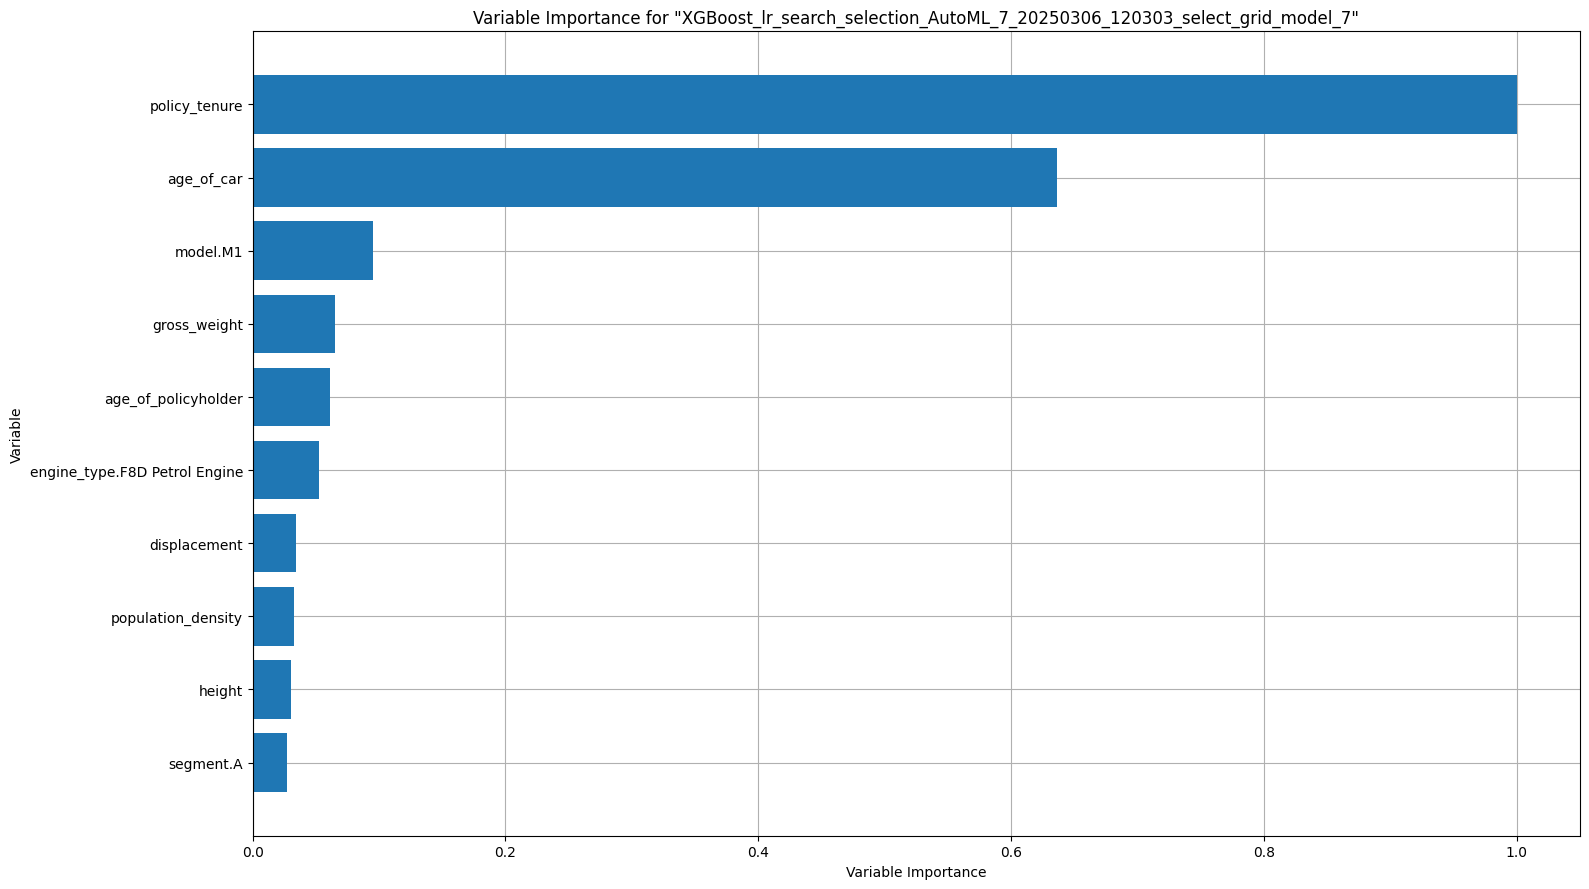

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

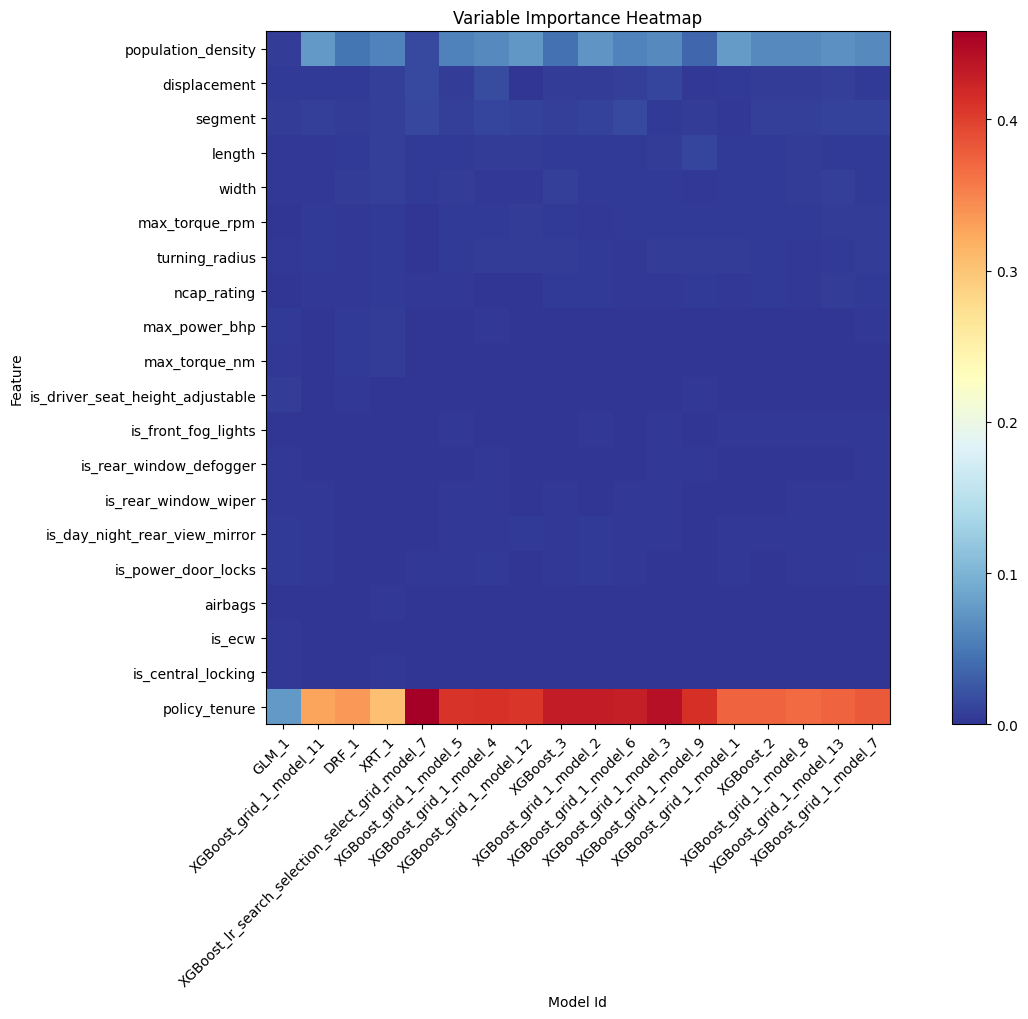

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

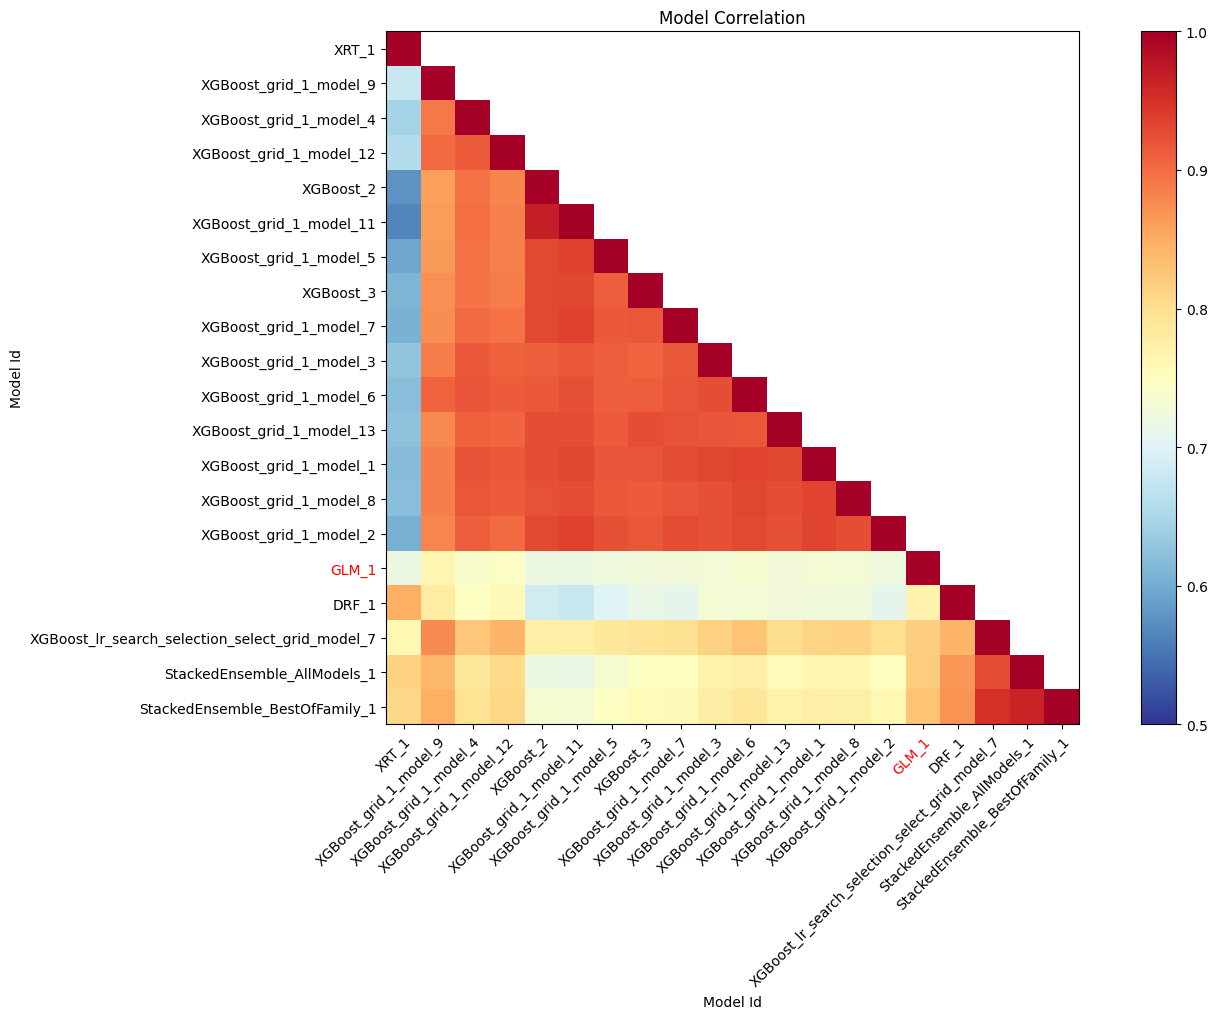

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

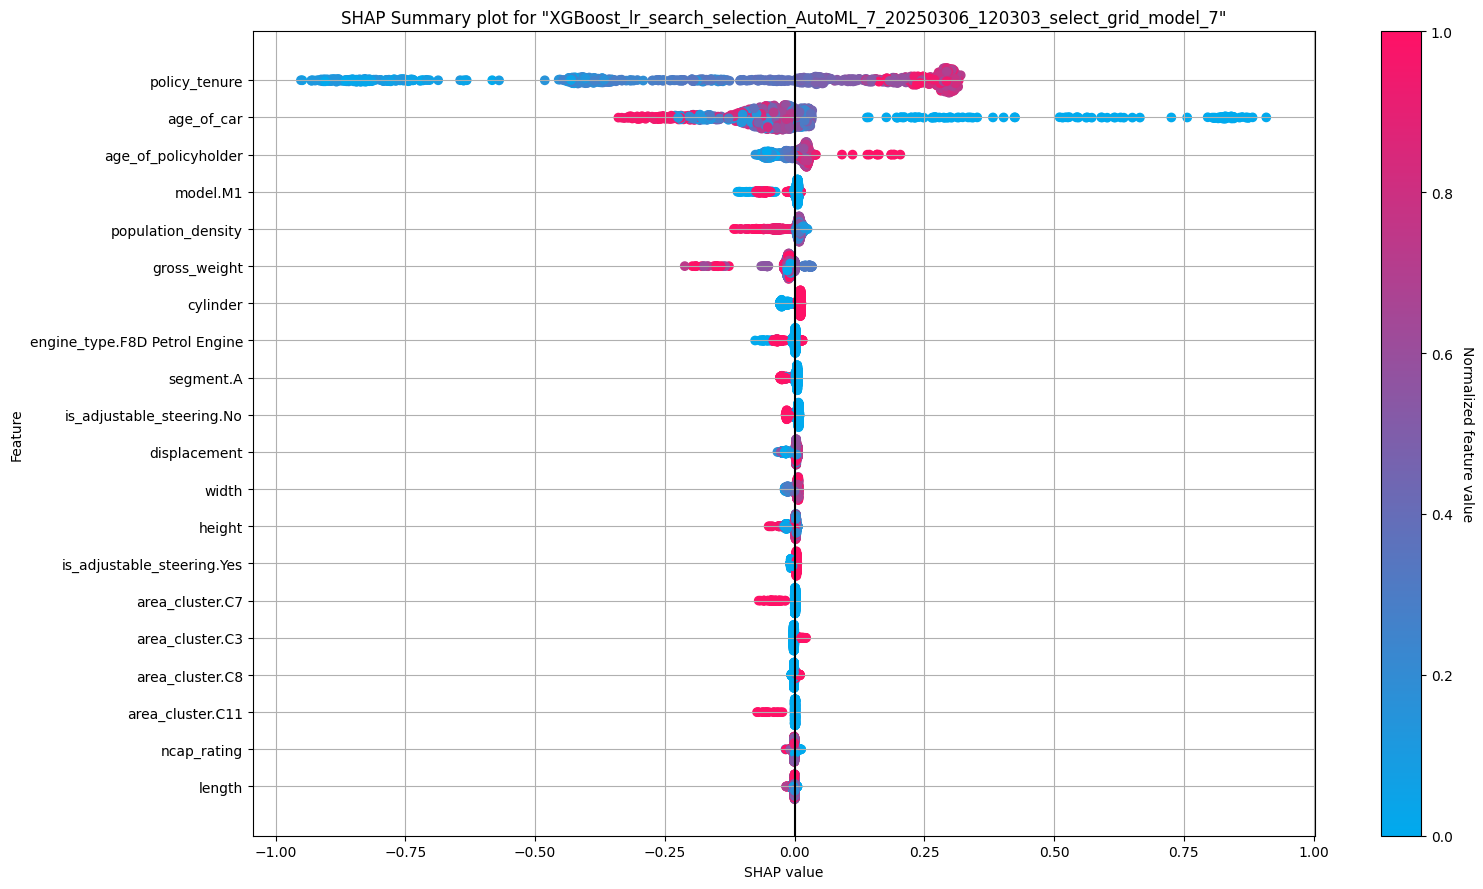

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

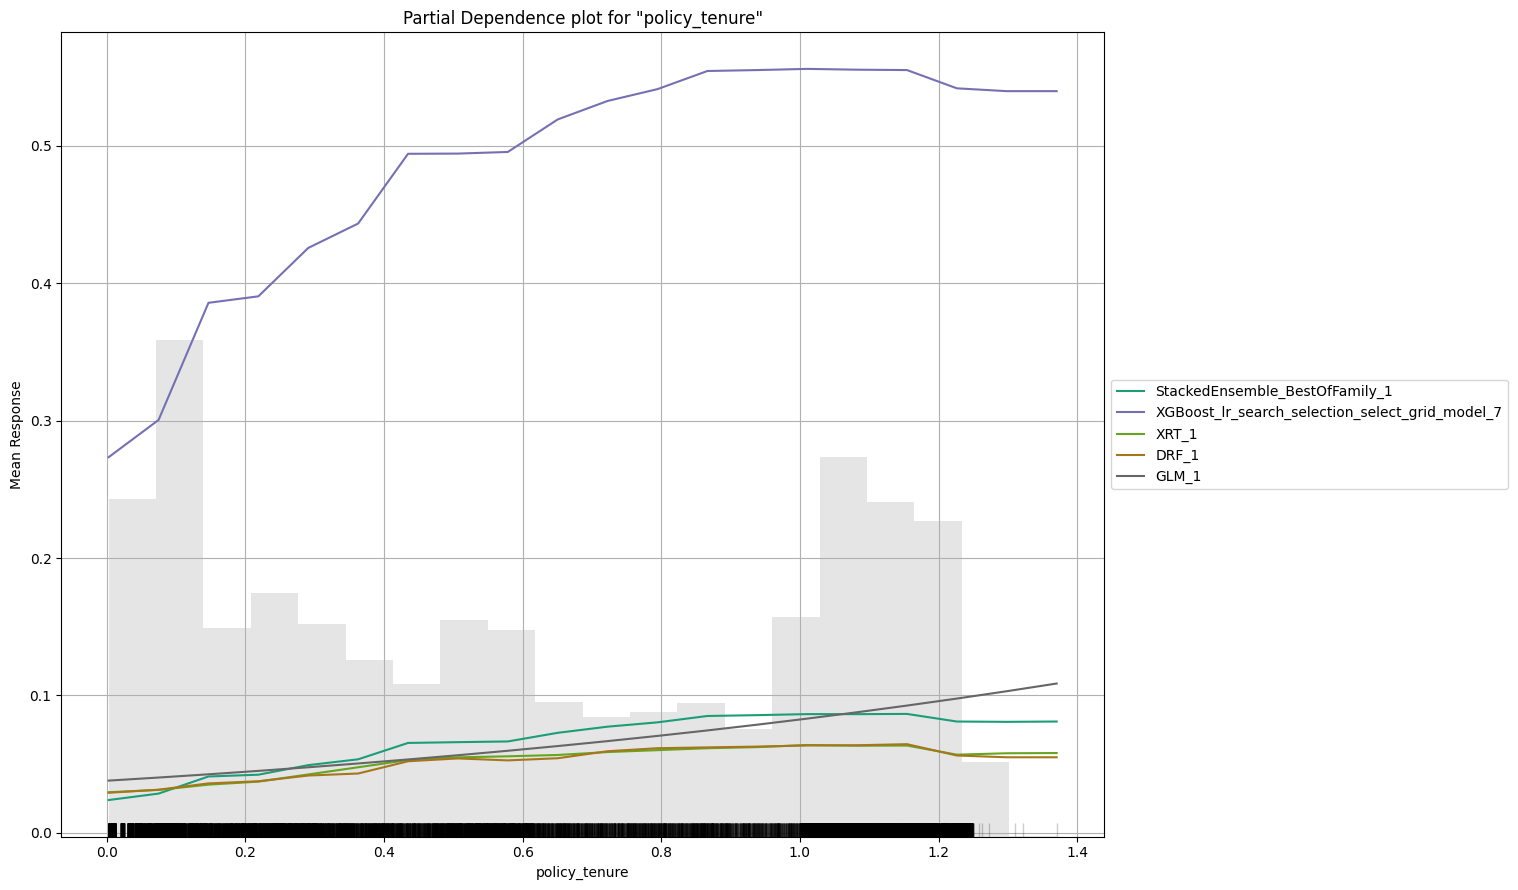

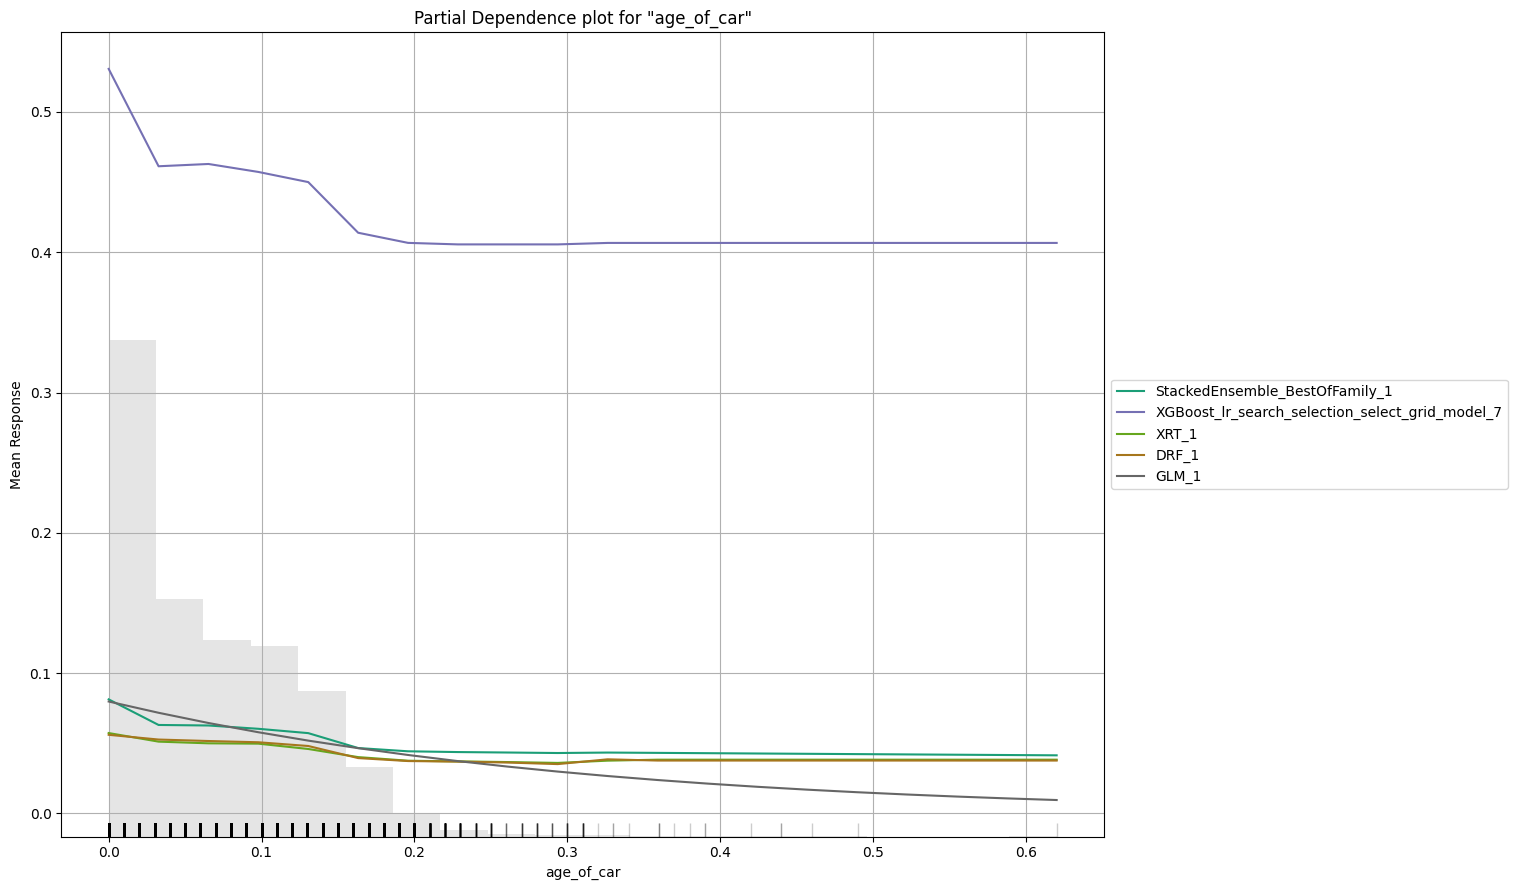

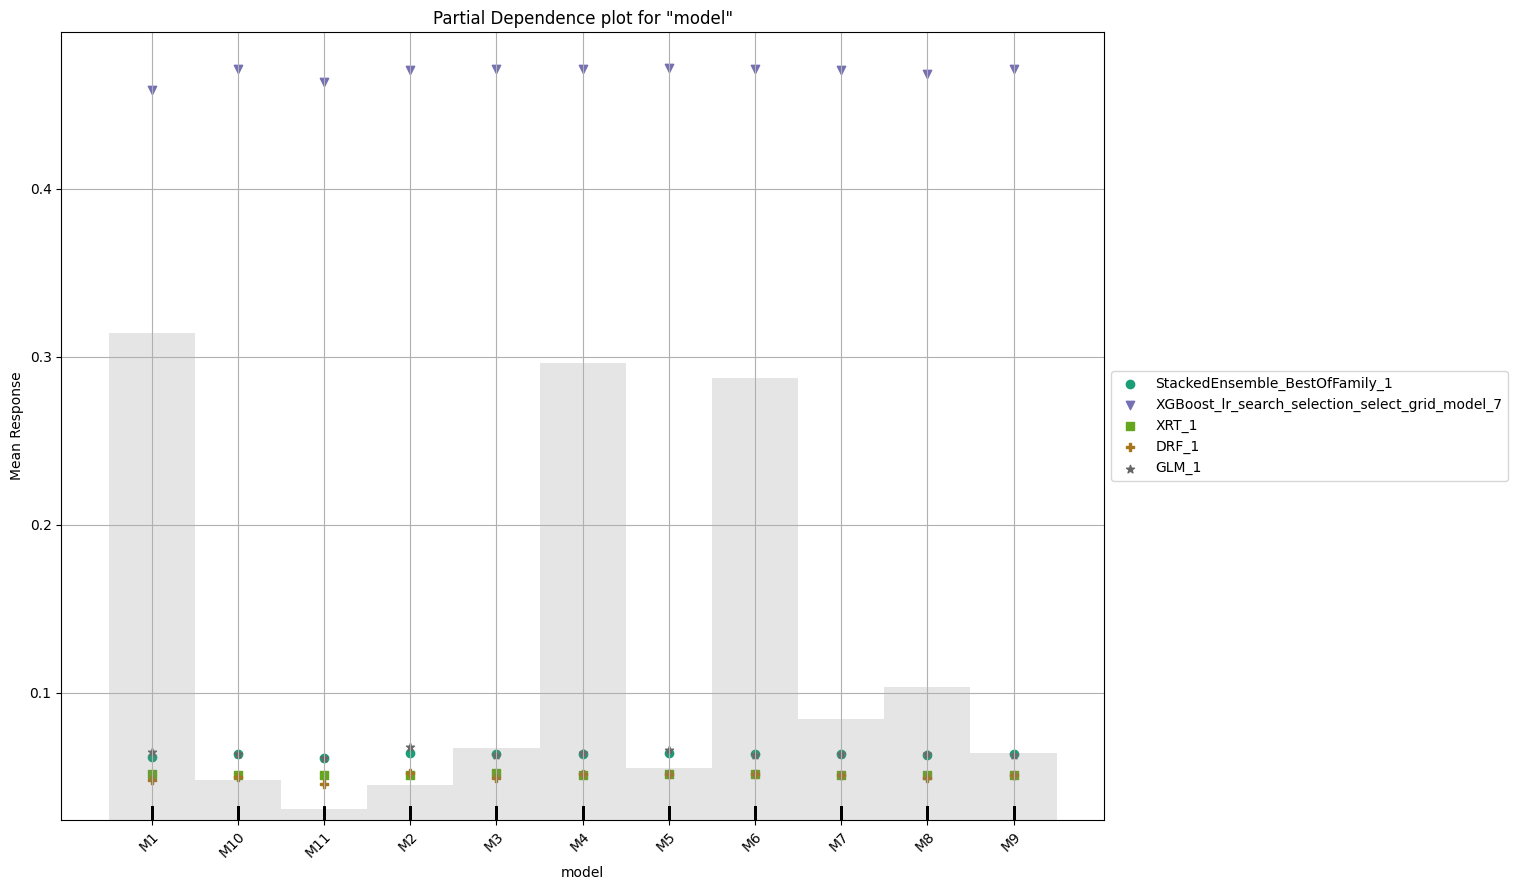

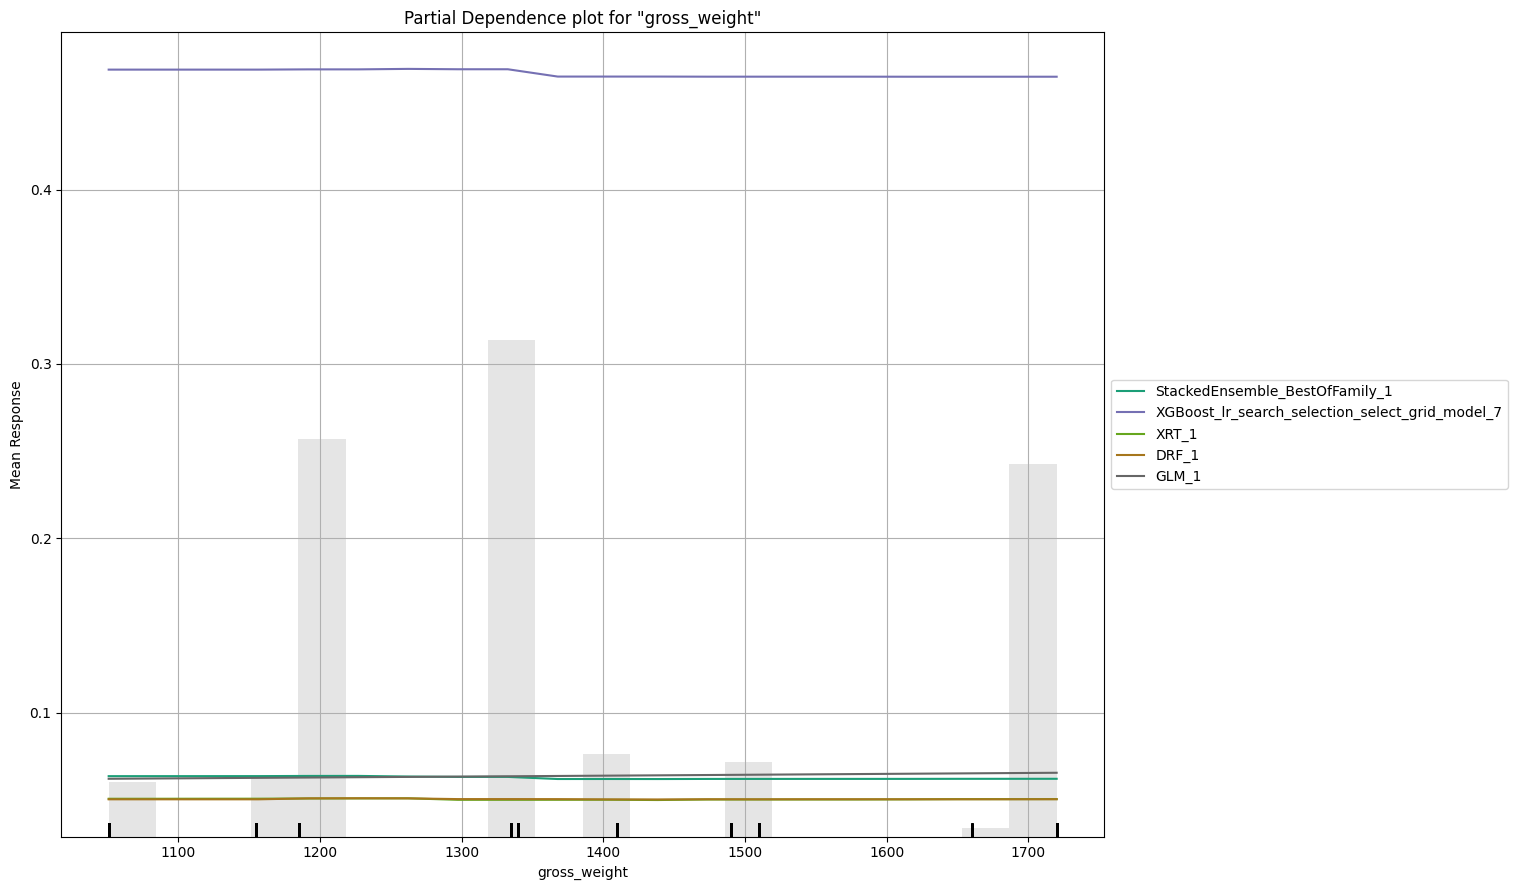

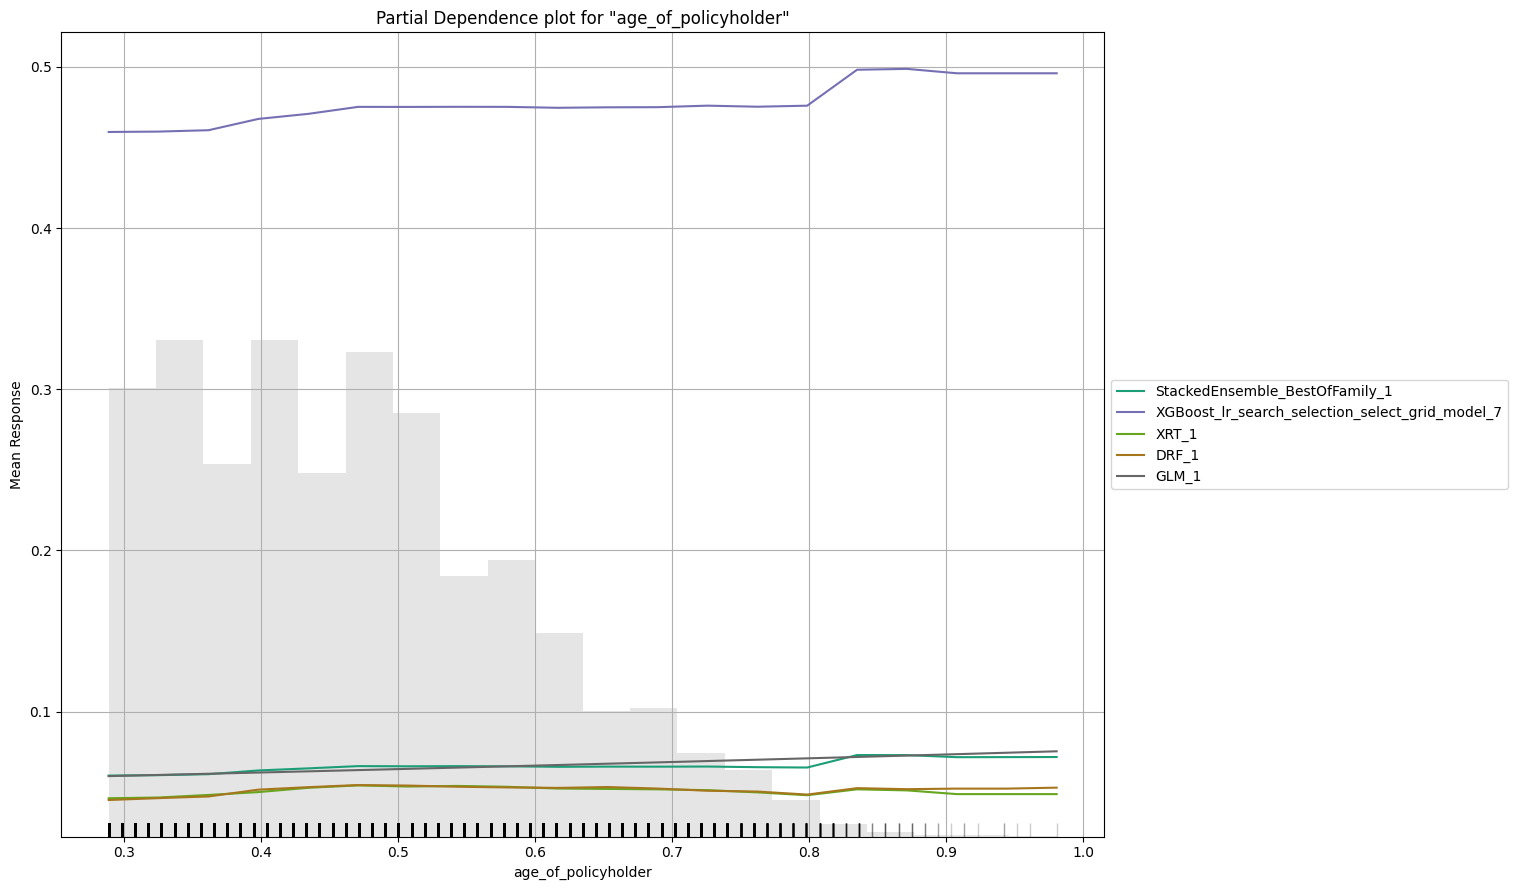

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_7_20250306_120303,0.104524,0.652842,0.228589,0.401118,0.242398,0.058757,5139,0.016988,StackedEnsemble
XGBoost_lr_search_selection_AutoML_7_20250306_120303_select_grid_model_7,0.104407,0.65323,0.651179,0.400962,0.480458,0.23084,6724,0.016774,XGBoost
StackedEnsemble_AllModels_1_AutoML_7_20250306_120303,0.104002,0.652338,0.228534,0.398996,0.242397,0.0587563,7589,0.017239,StackedEnsemble
XGBoost_grid_1_AutoML_7_20250306_120303_model_9,0.099062,0.640525,0.618497,0.414644,0.466528,0.217648,2317,0.003866,XGBoost
XRT_1_AutoML_7_20250306_120303,0.0970119,0.635544,0.232894,0.410845,0.243346,0.0592174,1483,0.007405,DRF
XGBoost_grid_1_AutoML_7_20250306_120303_model_6,0.0964272,0.637335,0.231929,0.407063,0.243601,0.0593414,1291,0.003145,XGBoost
DRF_1_AutoML_7_20250306_120303,0.0951205,0.628077,0.233544,0.415833,0.243462,0.0592738,1322,0.010023,DRF
XGBoost_grid_1_AutoML_7_20250306_120303_model_12,0.0949948,0.632493,0.232615,0.405043,0.243671,0.0593755,1598,0.003752,XGBoost
XGBoost_grid_1_AutoML_7_20250306_120303_model_8,0.0917918,0.623863,0.235745,0.406587,0.244772,0.0599131,1777,0.004547,XGBoost
XGBoost_grid_1_AutoML_7_20250306_120303_model_4,0.0913687,0.622868,0.234757,0.407684,0.244413,0.0597376,1555,0.004314,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_7_20250306_120303


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07774610586914303: 


,,0,1,Error,Rate
0,0,9146.0,4713.0,0.3401,(4713.0/13859.0)
1,1,421.0,531.0,0.4422,(421.0/952.0)
2,Total,9567.0,5244.0,0.3466,(5134.0/14811.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [ ]:

aml_top_aucpr_engineered_exploitation.explain(df_test)


# Explore top model

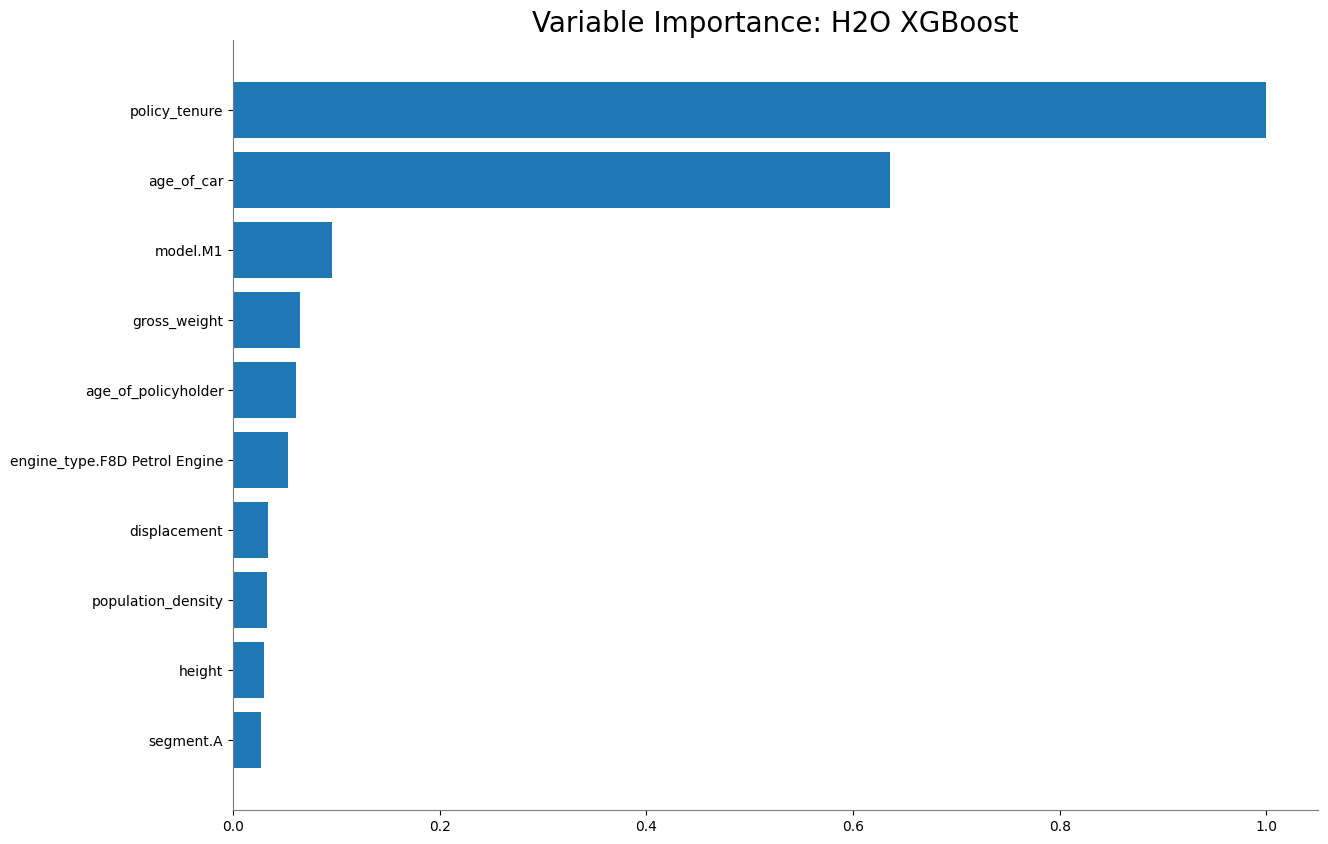

<Figure size 640x480 with 0 Axes>

In [ ]:

df_leaderboard = aml_top_aucpr_engineered_exploitation.leaderboard.as_data_frame()
df_leaderboard["flag_stackedensemble"] = df_leaderboard["model_id"].map(lambda x: 1 if "StackedEnsemble" in x else 0)
df_leaderboard = df_leaderboard[df_leaderboard["flag_stackedensemble"]==0]
df_leaderboard.reset_index(drop=True, inplace=True)

top_model = h2o.get_model(df_leaderboard["model_id"][0])
top_model.varimp_plot()


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_lr_search_selection_AutoML_7_20250306_120303_select_grid_model_7


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5667374237225605: 


,,0,1,Error,Rate
0,0,10434.0,3425.0,0.2471,(3425.0/13859.0)
1,1,541.0,411.0,0.5683,(541.0/952.0)
2,Total,10975.0,3836.0,0.2678,(3966.0/14811.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

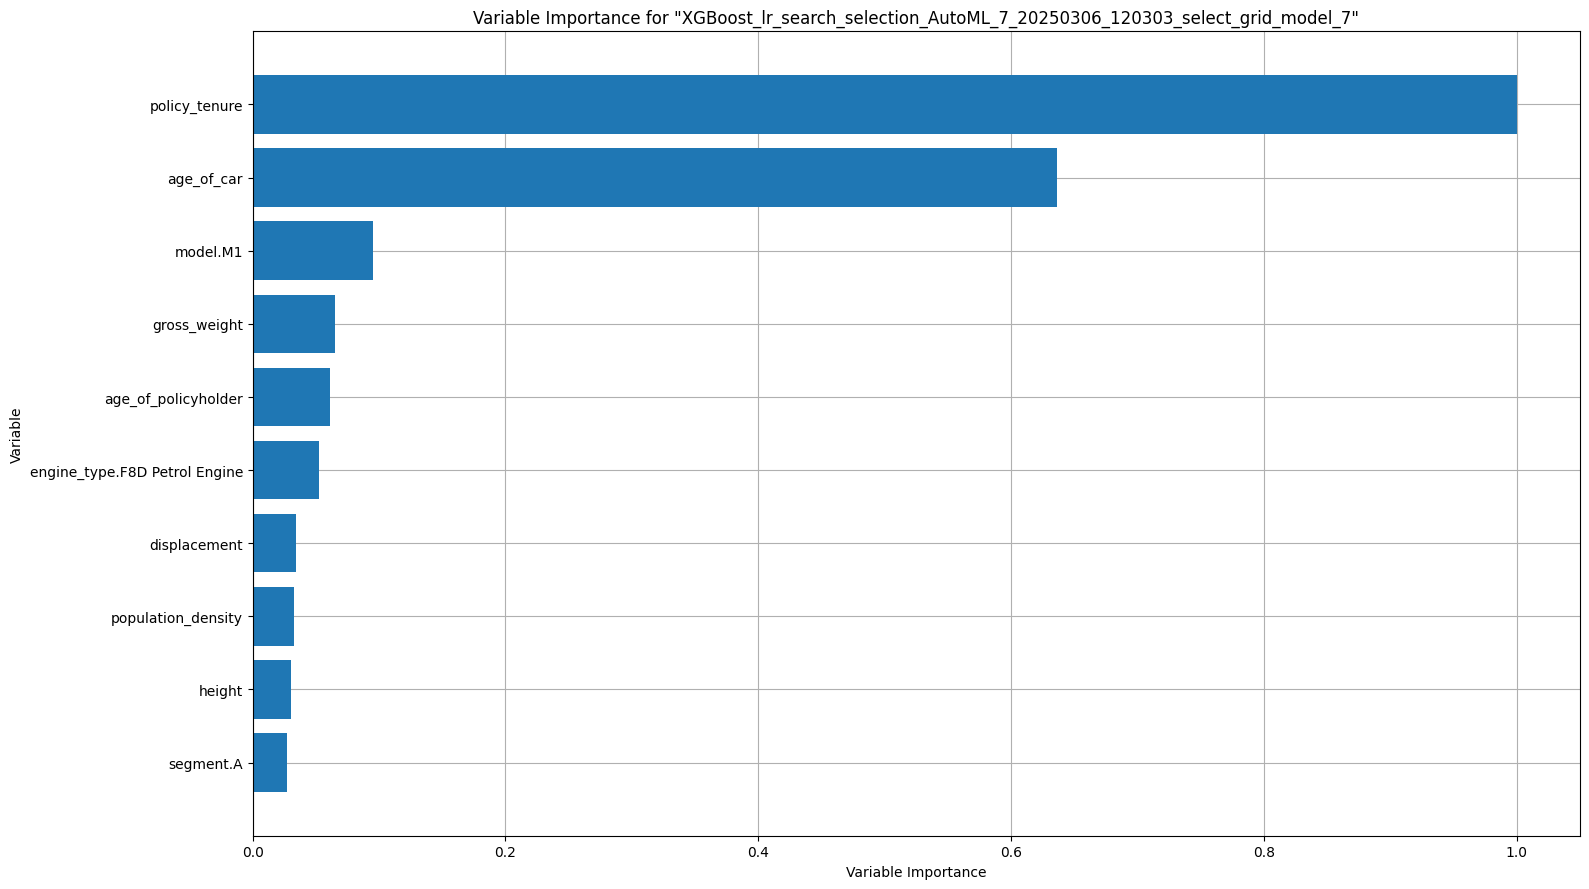

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

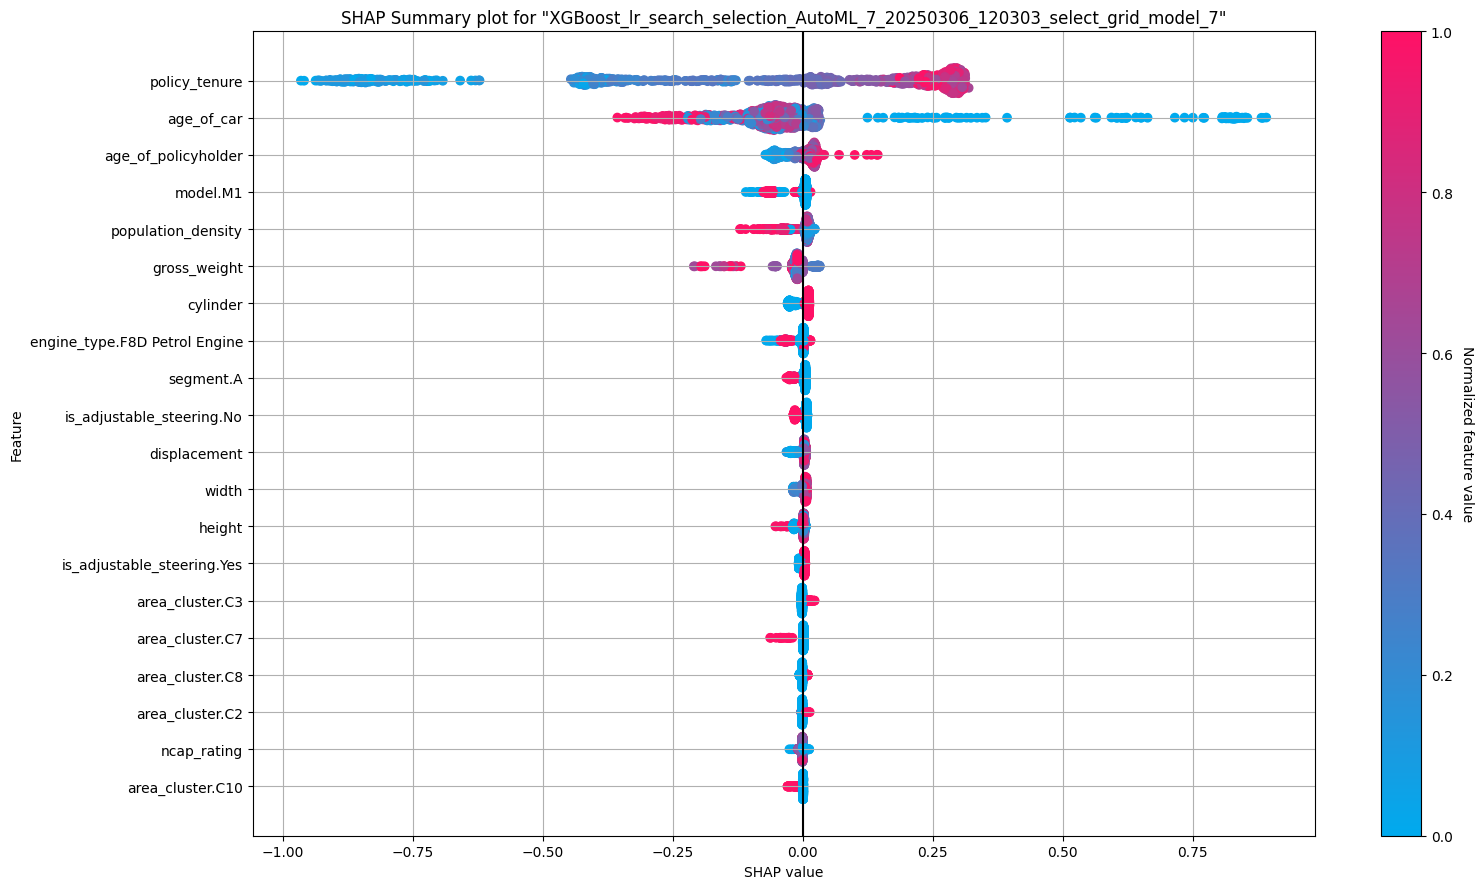

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

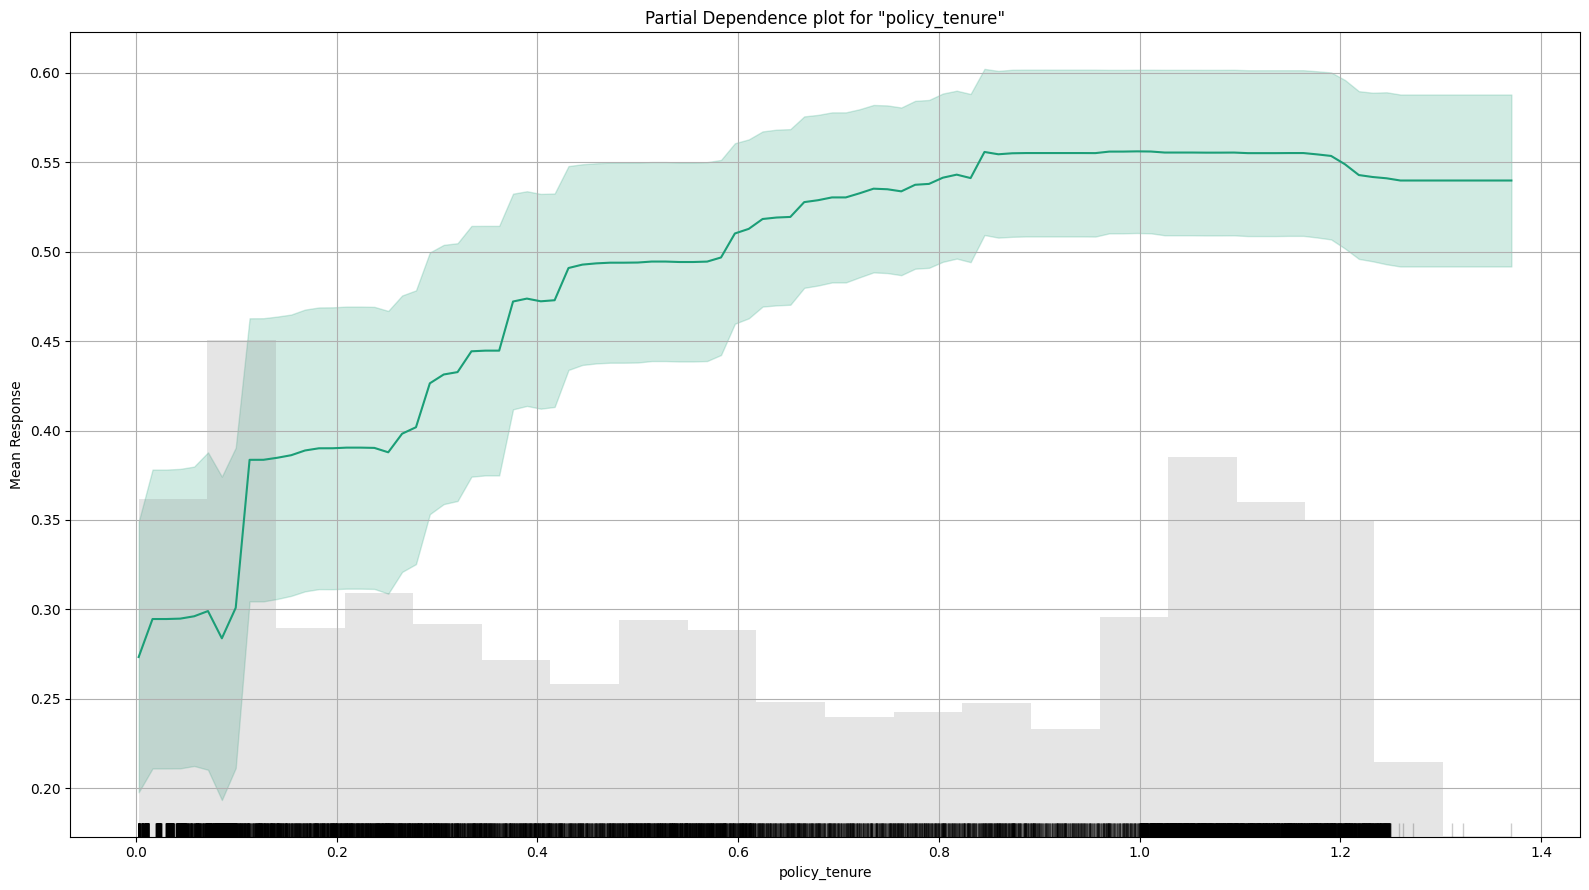

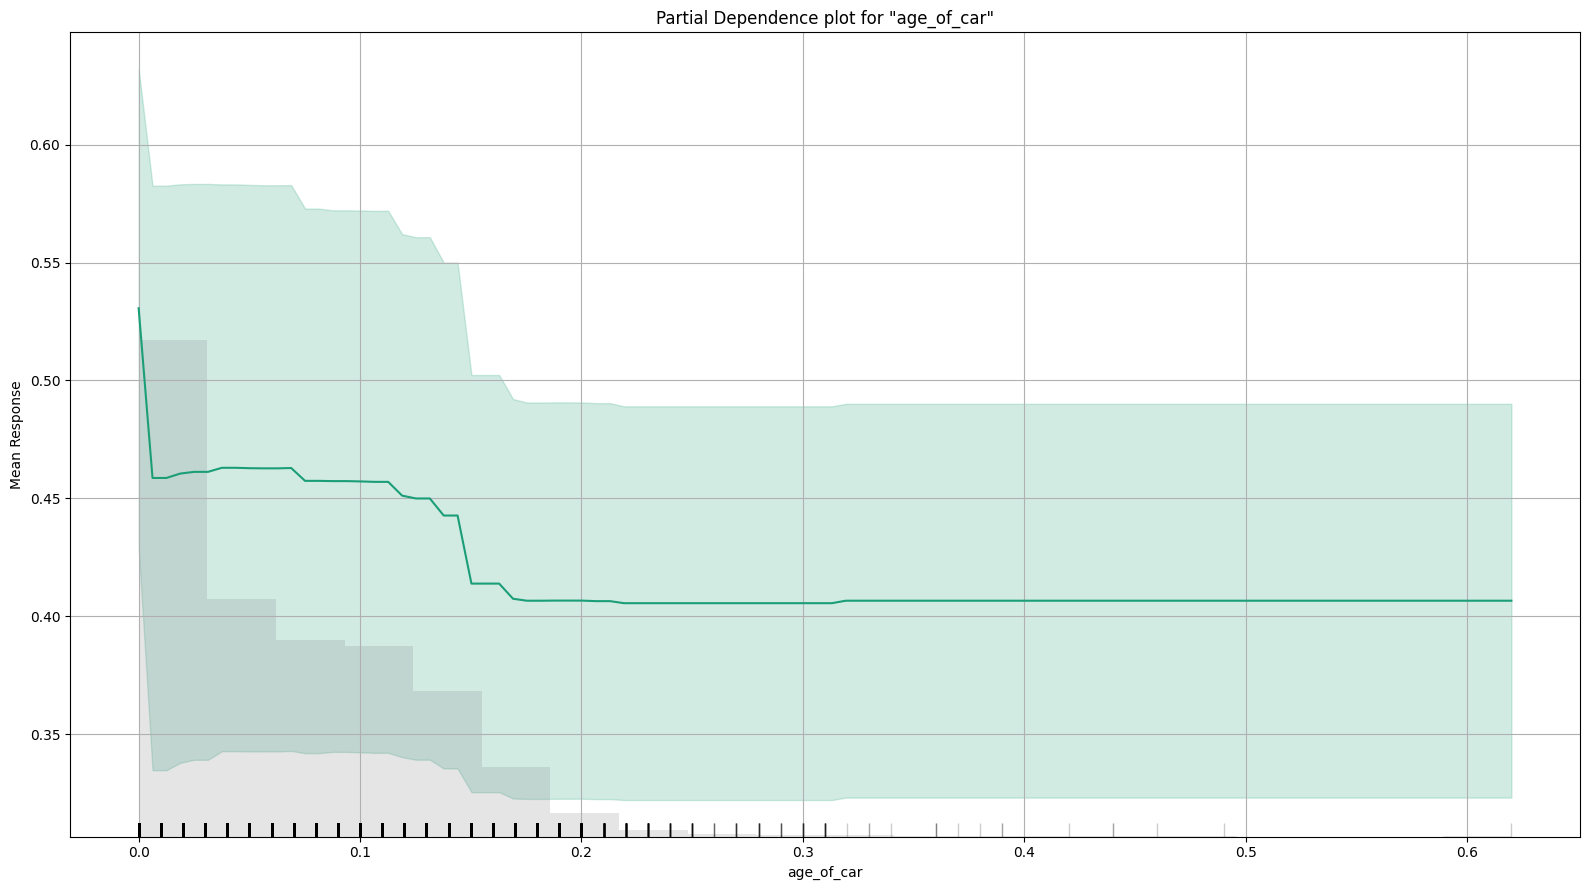

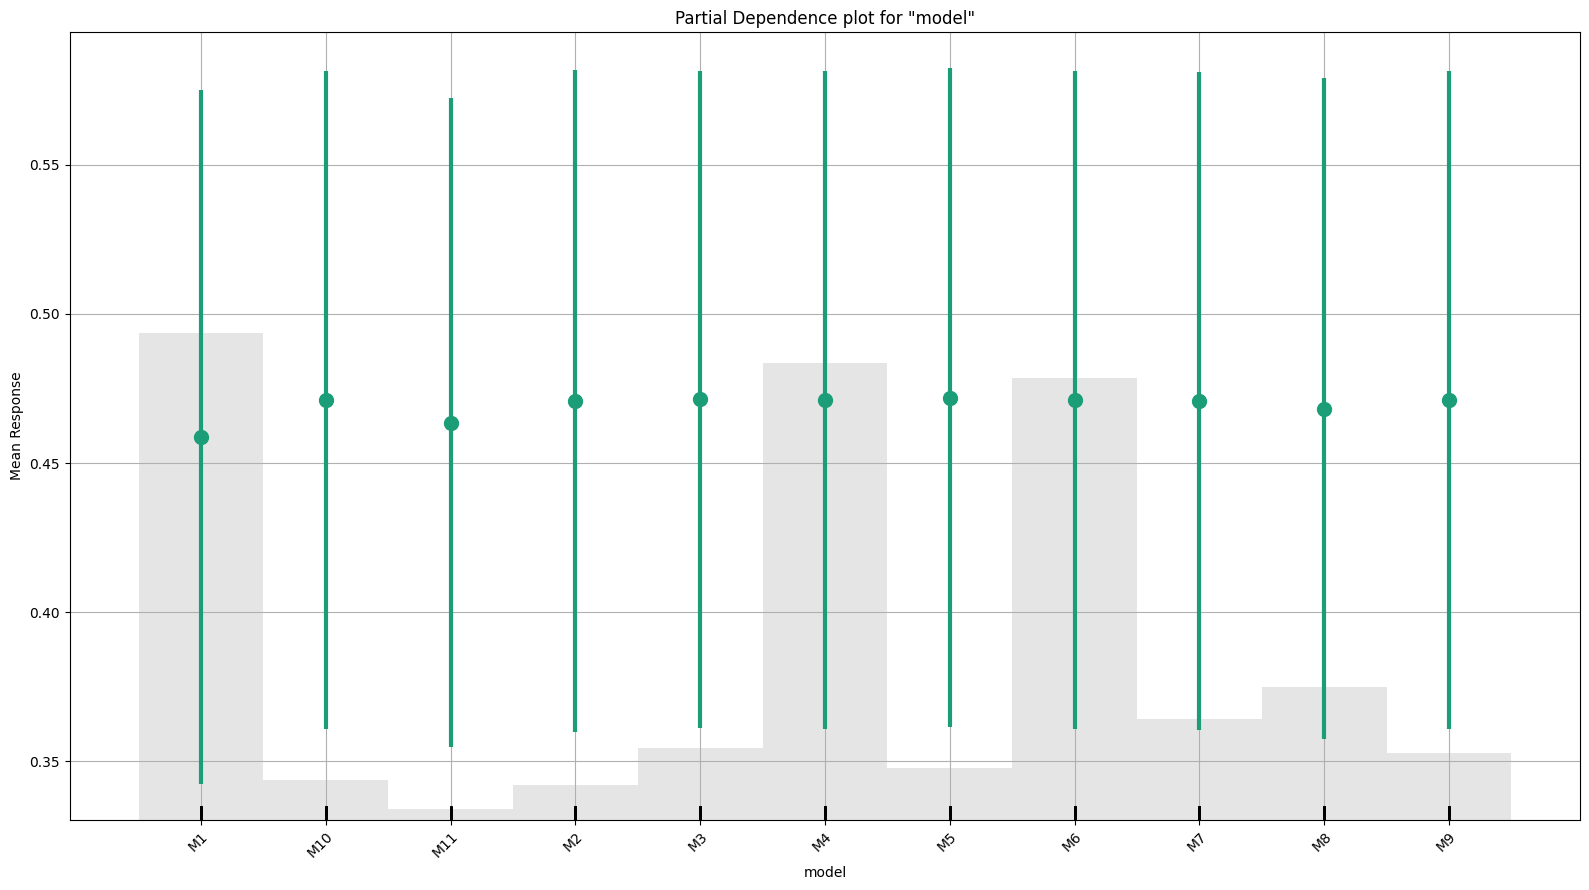

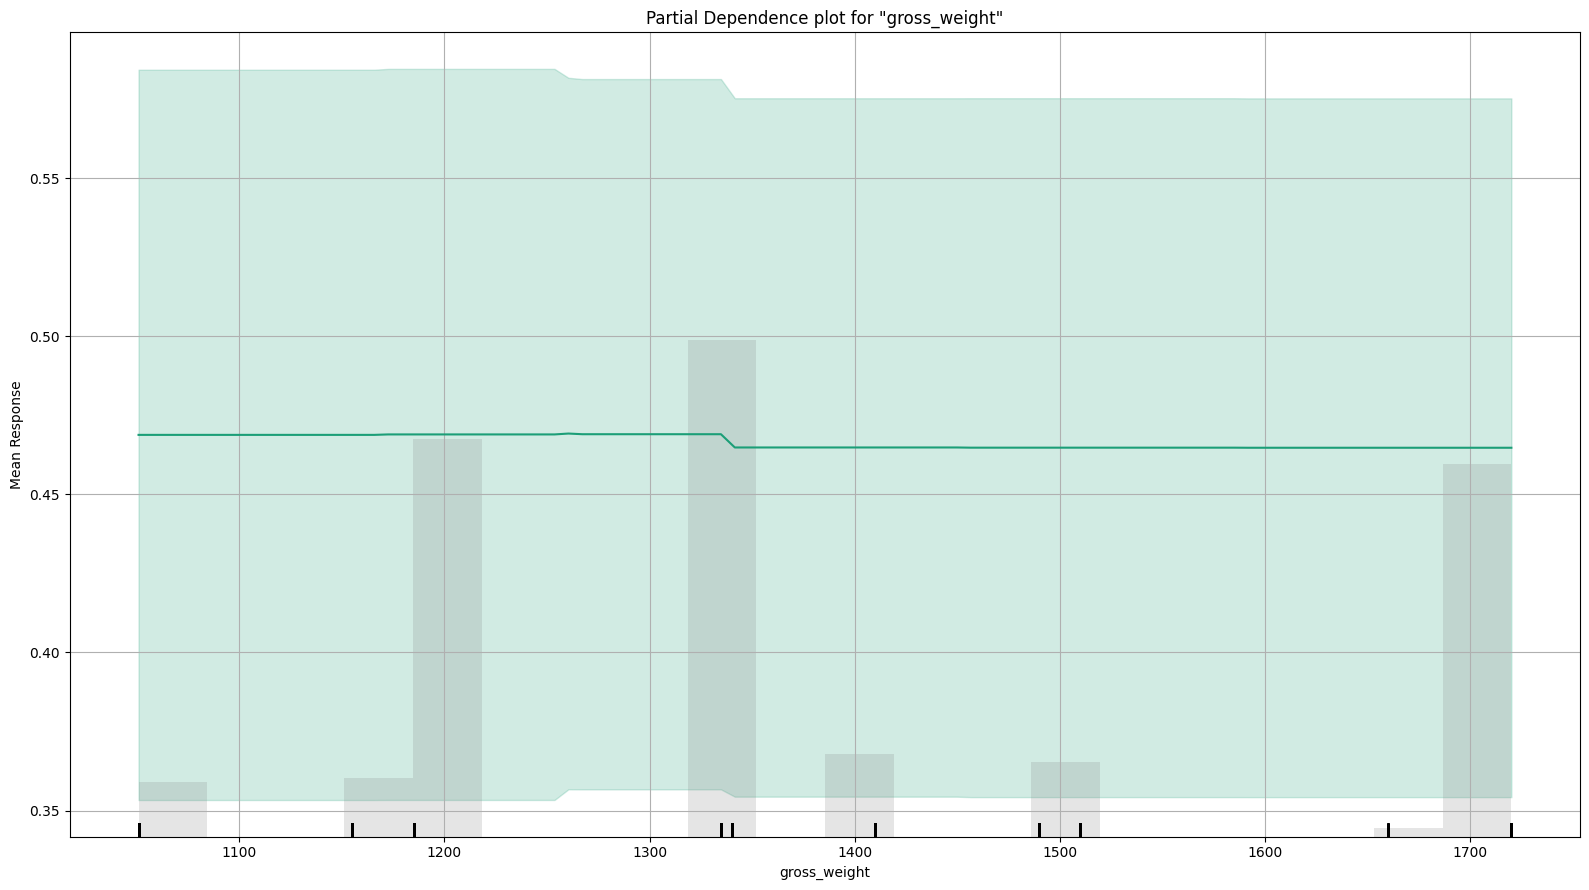

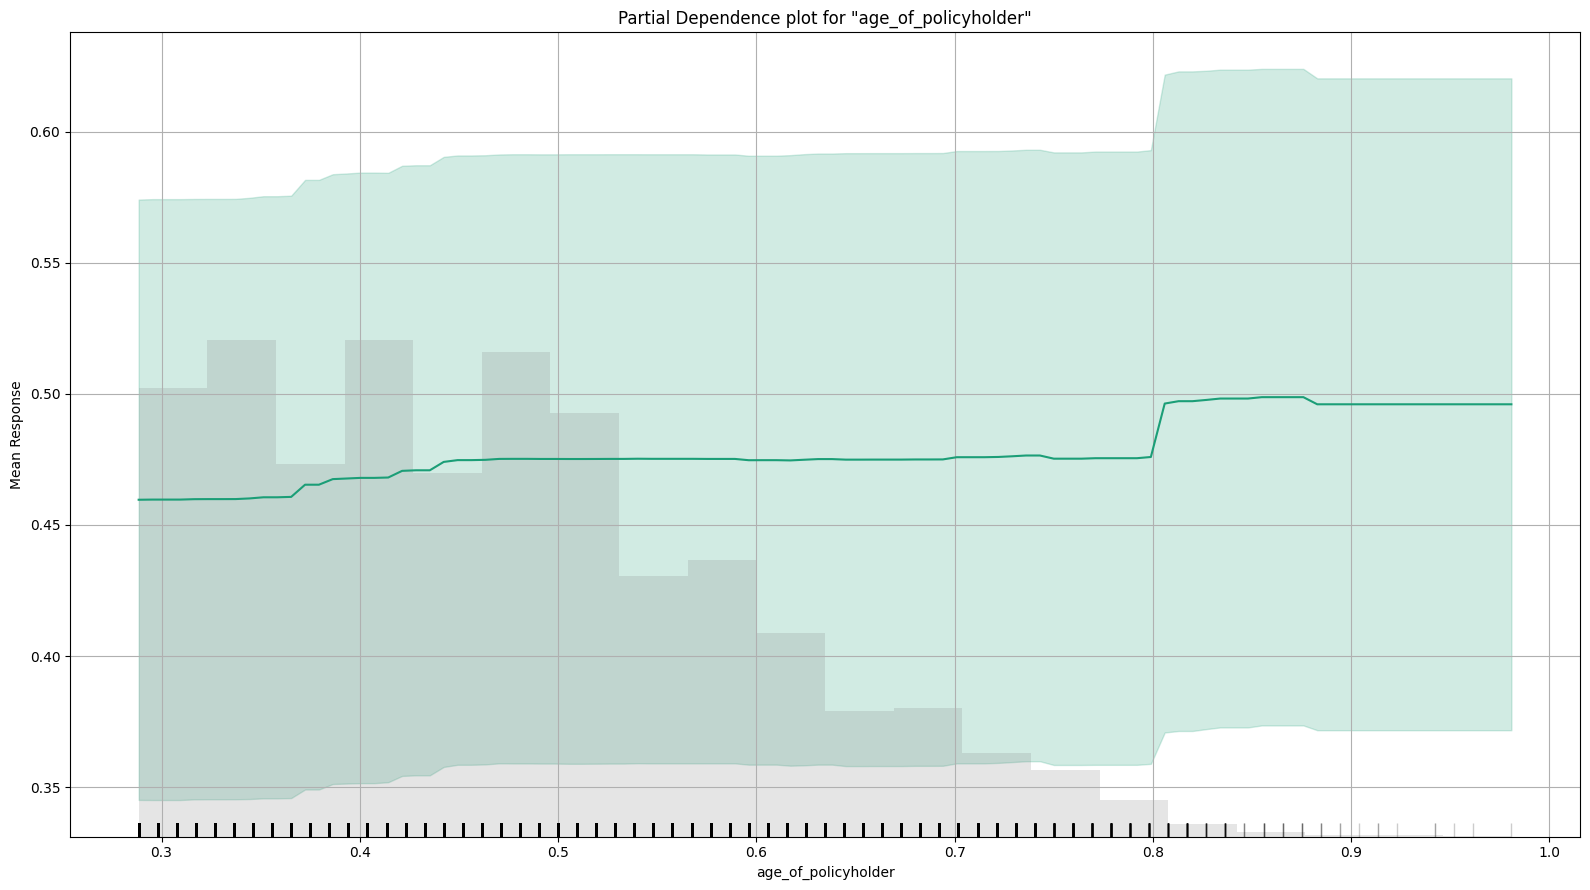

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_lr_search_selection_AutoML_7_20250306_120303_select_grid_model_7


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5667374237225605: 


,,0,1,Error,Rate
0,0,10434.0,3425.0,0.2471,(3425.0/13859.0)
1,1,541.0,411.0,0.5683,(541.0/952.0)
2,Total,10975.0,3836.0,0.2678,(3966.0/14811.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [ ]:

top_model.explain(df_test)


In [ ]:

h2o.save_model(top_model)


'/mnt/custom-file-systems/efs/fs-097144510613850bb_fsap-087c66f68e1c6cd90/tmp_universita_polimi/XGBoost_lr_search_selection_AutoML_7_20250306_120303_select_grid_model_7'